In [53]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker
import awkward as ak
import uproot 
import mplhep as hep
import hist
import os
from matplotlib.colors import LogNorm


from UtilityAndConst import *
from Functions import *

dir = "/Users/francescolarovere/Documents/Tesi-Triennale/Dati"
os.chdir(dir)

hep.style.use("CMS")
np.set_printoptions(threshold=np.inf)

In [54]:
#Importing file

LS133 = "./ntupleStubsBmtfGmt_LS133.root"
LS263 = "./ntupleStubsBmtfGmt_LS263.root"
LS264 = "./ntupleStubsBmtfGmt_LS264.root"
LS306 = "./ntupleStubsBmtfGmt_LS306.root"

#Open file
bmtf_awk_LS133 = OpenRootFile(LS133, bmtf_features)
bmtf_awk_LS263 = OpenRootFile(LS263, bmtf_features)
bmtf_awk_LS264 = OpenRootFile(LS264, bmtf_features)
bmtf_awk_LS306 = OpenRootFile(LS306, bmtf_features)

stubs_awk_LS133 = OpenRootFile(LS133, stub_features)
stubs_awk_LS263 = OpenRootFile(LS263, stub_features)
stubs_awk_LS264 = OpenRootFile(LS264, stub_features)
stubs_awk_LS306 = OpenRootFile(LS306, stub_features)


#Caricamenot BX delle stubs
BX_LS133 = stubs_awk_LS133.bx
BX_LS263 = stubs_awk_LS263.bx
BX_LS264 = stubs_awk_LS264.bx
BX_LS306 = stubs_awk_LS306.bx

#Caricamento informazioni sulle stubs che possono contenere candidati muoni 
nBmtfMuons_LS133 = bmtf_awk_LS133.nBmtfMuons
nBmtfMuons_LS263 = bmtf_awk_LS263.nBmtfMuons
nBmtfMuons_LS264 = bmtf_awk_LS264.nBmtfMuons
nBmtfMuons_LS306 = bmtf_awk_LS306.nBmtfMuons

In [55]:
print(nBmtfMuons_LS133)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..., 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]


In [56]:
bx_range = np.arange(ONE_ORBIT_IN_BX + 2)

bx_bmtf_counts_LS133 = np.bincount(BX_LS133, weights=nBmtfMuons_LS133)
bx_bmtf_counts_LS263 = np.bincount(BX_LS263, weights=nBmtfMuons_LS263)
bx_bmtf_counts_LS264 = np.bincount(BX_LS264, weights=nBmtfMuons_LS264)
bx_bmtf_counts_LS306 = np.bincount(BX_LS306, weights=nBmtfMuons_LS306)

bx_bmtf_counts = (bx_bmtf_counts_LS133 + bx_bmtf_counts_LS263 + bx_bmtf_counts_LS264 + bx_bmtf_counts_LS306)/4



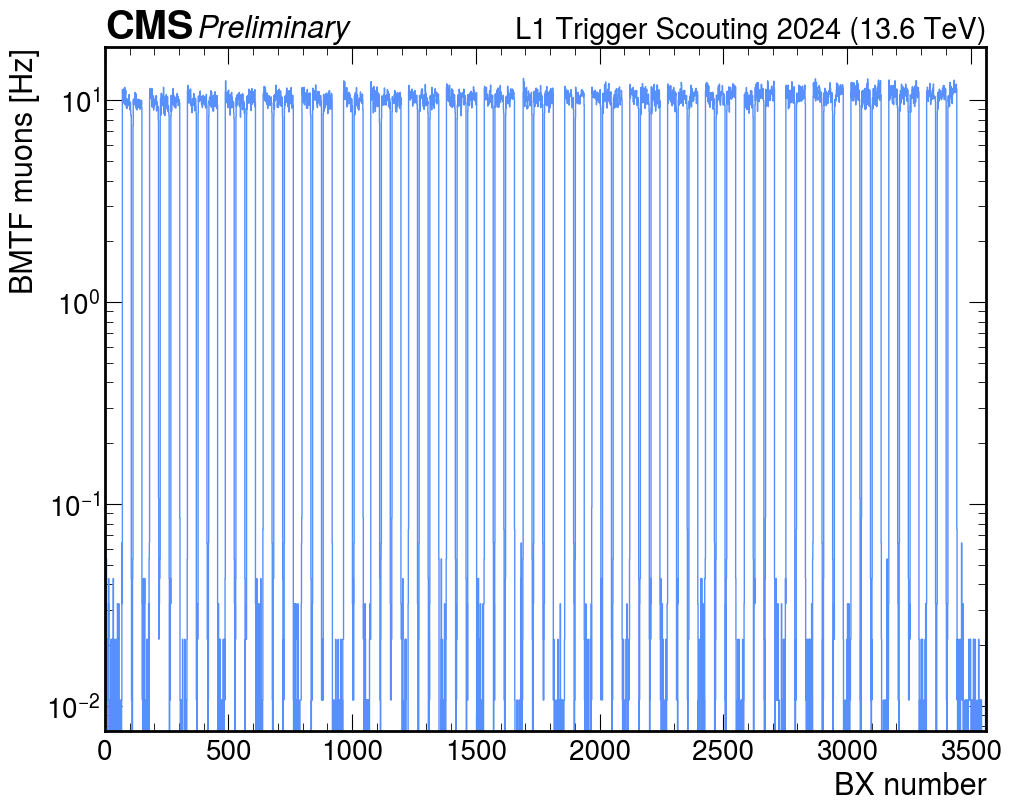

In [57]:
#Plot con i quattro file uniti
fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.hist(bx_range[:-1], bins=bx_range, weights=ConvertToHz(bx_bmtf_counts), histtype='step')

ax.set_xlabel('BX number')
ax.set_ylabel('BMTF muons [Hz]')
ax.set_xlim(0, ONE_ORBIT_IN_BX)
ax.set_yscale('log')

plt.savefig("../Immagini/BMTF.pdf")
plt.savefig("../Immagini/ImmaginiPNG/BMTF.png")

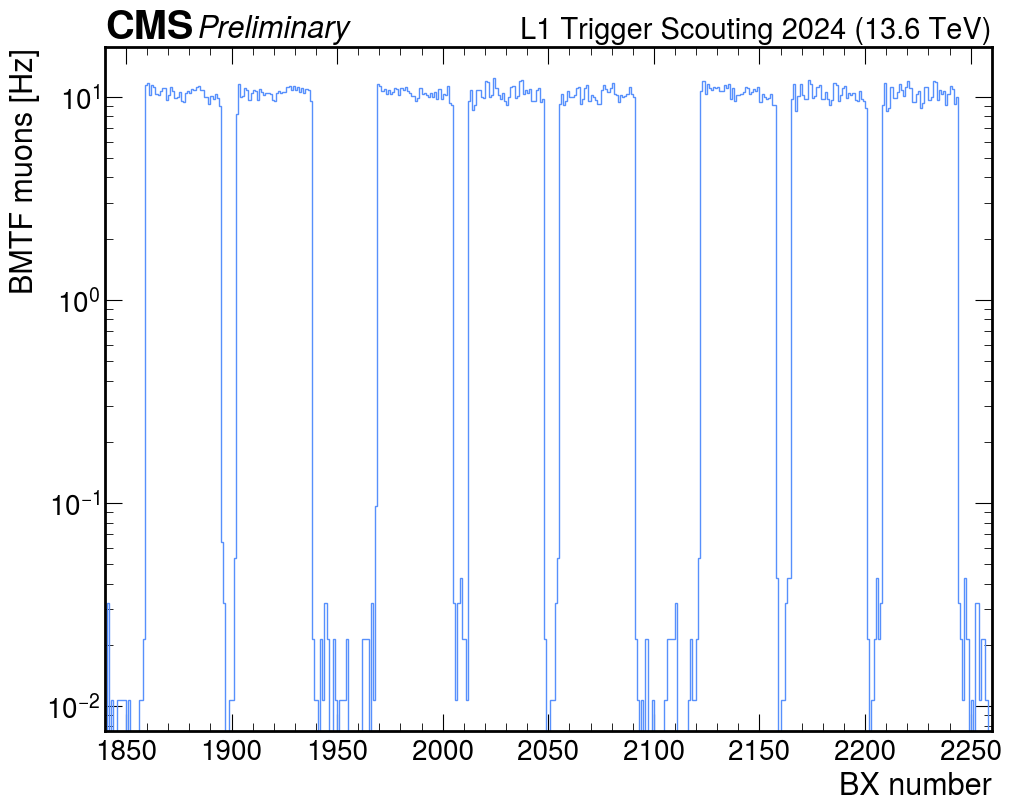

In [58]:
#Zoom dei quattro file uniti
fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

bx_left = 1840
bx_right = 2260

ax.hist(bx_range[bx_left:bx_right], bins=bx_range[bx_left:bx_right+1], weights=ConvertToHz(bx_bmtf_counts[bx_left:bx_right]), histtype='step')

ax.set_xlabel('BX number')
ax.set_ylabel('BMTF muons [Hz]')
ax.set_xlim(bx_left, bx_right)
ax.set_yscale('log')

plt.savefig("../Immagini/BMTF_zoom.pdf")
plt.savefig("../Immagini/ImmaginiPNG/BMTF_zoom.png")

# Molteplicità per bx e per orbit

La maggiorparte degli eventi ha un numero pari a 0 di BX, ma c'è da ricordare che in questo grafico ci sono tutti gli eventi (pari a circa 3 milioni), quindi la maggiorparte non sono stati validati dal BMTF per essere muoni. Vegono visualizzati anche quelli per completezza

In [59]:
nBmtfLS133_count = ConvertToHz(np.bincount(nBmtfMuons_LS133))
nBmtfLS263_count = ConvertToHz(np.bincount(nBmtfMuons_LS263))
nBmtfLS264_count = ConvertToHz(np.bincount(nBmtfMuons_LS264))
nBmtfLS306_count = ConvertToHz(np.bincount(nBmtfMuons_LS306))

nBmtf_Array = ak.Array([nBmtfLS133_count, nBmtfLS263_count, nBmtfLS264_count, nBmtfLS306_count])

MaxStubs = max(len(nBmtf_Array[0]), len(nBmtf_Array[1]), len(nBmtf_Array[2]), len(nBmtf_Array[3]))

#Filled Array per eseguire una somma vettoriale dei 4 array
FnBmtfLS133 = ak.fill_none(ak.pad_none(nBmtf_Array[0], MaxStubs, axis = 0, clip=True), 0)
FnBmtfLS263 = ak.fill_none(ak.pad_none(nBmtf_Array[1], MaxStubs, axis = 0, clip=True), 0)
FnBmtfLS264 = ak.fill_none(ak.pad_none(nBmtf_Array[2], MaxStubs, axis = 0, clip=True), 0)
FnBmtfLS306 = ak.fill_none(ak.pad_none(nBmtf_Array[3], MaxStubs, axis = 0, clip=True), 0)

nBmtf = FnBmtfLS133 + FnBmtfLS263 + FnBmtfLS264 + FnBmtfLS306
print(nBmtf)

[4.07e+05, 8.35e+04, 6.39e+03, 157, 7.62, 0.171, 0.0428]


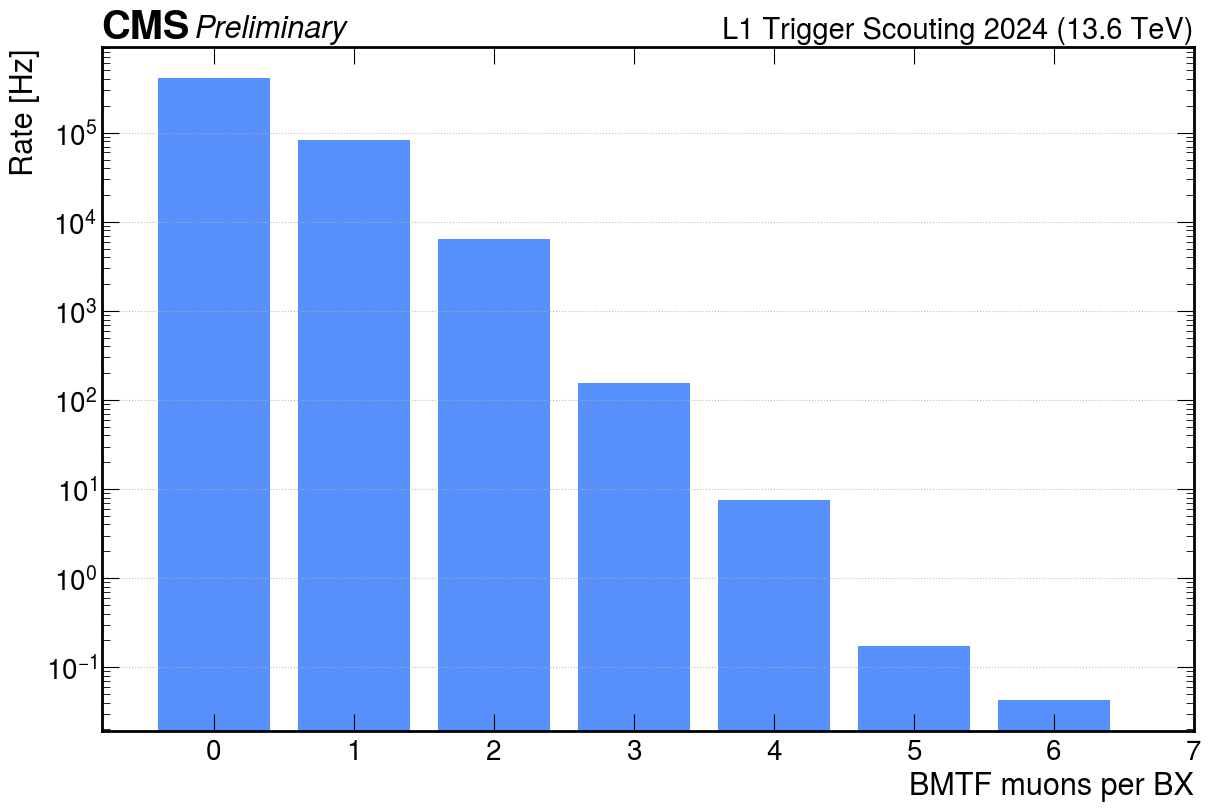

In [119]:
fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.bar(np.arange(len(nBmtf)), nBmtf)

ax.tick_params(axis='x', which='minor', length=0)
ax.set_xlabel('BMTF muons per BX')
ax.set_ylabel('Rate [Hz]')
ax.set_xlim(-0.8, 7)
ax.grid(visible=True, axis='y')
ax.set_yscale('log')

plt.savefig("../Immagini/BMTF_stubs.pdf")
plt.savefig("../Immagini/ImmaginiPNG/BMTF_stubs.png")

In [61]:
#Calcola le stubs per orbit, tempo di compilazione 4 minuti 
'''
BmtfPerOrbitLS133 = StubsPerOrbit(BX_LS133, nBmtfMuons_LS133)
BmtfPerOrbitLS263 = StubsPerOrbit(BX_LS263, nBmtfMuons_LS263)
BmtfPerOrbitLS264 = StubsPerOrbit(BX_LS264, nBmtfMuons_LS264)
BmtfPerOrbitLS306 = StubsPerOrbit(BX_LS306, nBmtfMuons_LS306)
'''

'\nBmtfPerOrbitLS133 = StubsPerOrbit(BX_LS133, nBmtfMuons_LS133)\nBmtfPerOrbitLS263 = StubsPerOrbit(BX_LS263, nBmtfMuons_LS263)\nBmtfPerOrbitLS264 = StubsPerOrbit(BX_LS264, nBmtfMuons_LS264)\nBmtfPerOrbitLS306 = StubsPerOrbit(BX_LS306, nBmtfMuons_LS306)\n'

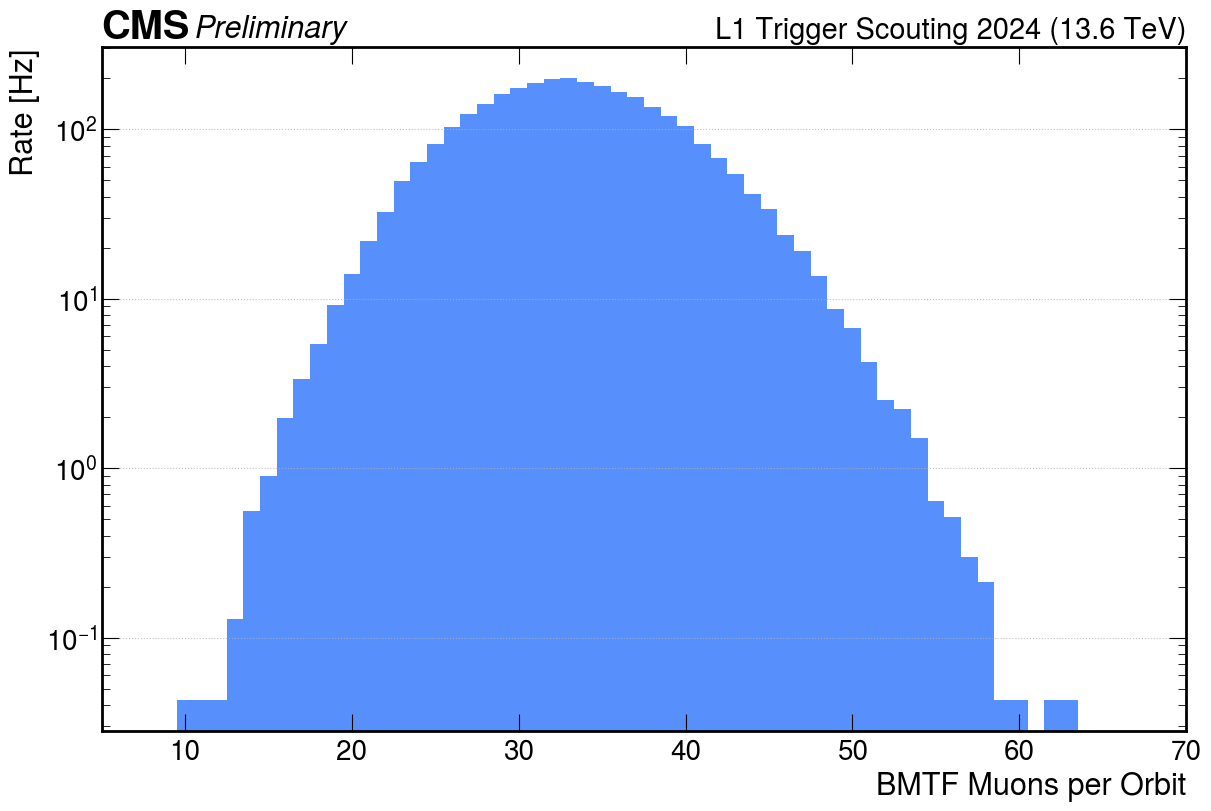

In [62]:
BmtfPerOrbit = ConvertToHz(BmtfPerOrbitLS133 + BmtfPerOrbitLS263 + BmtfPerOrbitLS264 + BmtfPerOrbitLS306)

fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.bar(np.arange(1, len(BmtfPerOrbit) + 1), BmtfPerOrbit, width=1)


#ax.set_xticks(ticks=np.arange(20), labels=np.arange(0, 20, 1))
ax.tick_params(axis='x', which='minor', length=0)
ax.set_xlabel('BMTF Muons per Orbit')
ax.set_ylabel('Rate [Hz]')
ax.set_xlim(5, 70)
ax.grid(visible=True, axis='y')
ax.set_yscale('log')

plt.savefig("../Immagini/BMTF_orbit.pdf")
plt.savefig("../Immagini/ImmaginiPNG/BMTF_orbit.png")

# Momenti Constrained and Unconstrained 

In [63]:
#Caricamento elementi Constrained e Unconstrained in Gev/c
bmtfPtLS133 = ak.flatten(bmtf_awk_LS133.bmtfPt)
bmtfPtLS263 = ak.flatten(bmtf_awk_LS263.bmtfPt)
bmtfPtLS264 = ak.flatten(bmtf_awk_LS264.bmtfPt)
bmtfPtLS306 = ak.flatten(bmtf_awk_LS306.bmtfPt)


bmtfPtuLS133 = ak.flatten(bmtf_awk_LS133.bmtfPtu)
bmtfPtuLS263 = ak.flatten(bmtf_awk_LS263.bmtfPtu)
bmtfPtuLS264 = ak.flatten(bmtf_awk_LS264.bmtfPtu)
bmtfPtuLS306 = ak.flatten(bmtf_awk_LS306.bmtfPtu)

BmtfEtaLS133 = ak.flatten(bmtf_awk_LS133.bmtfEta)
BmtfEtaLS263 = ak.flatten(bmtf_awk_LS263.bmtfEta)
BmtfEtaLS264 = ak.flatten(bmtf_awk_LS264.bmtfEta)
BmtfEtaLS306 = ak.flatten(bmtf_awk_LS306.bmtfEta)

Pt = ak.concatenate([bmtfPtLS133, bmtfPtLS263, bmtfPtLS264, bmtfPtLS306])
Ptu = ak.concatenate([bmtfPtuLS133, bmtfPtuLS263, bmtfPtuLS264, bmtfPtuLS306])
BmtfEta = ak.concatenate([BmtfEtaLS133, BmtfEtaLS263, BmtfEtaLS264, BmtfEtaLS306])

PtDiff = Pt - Ptu

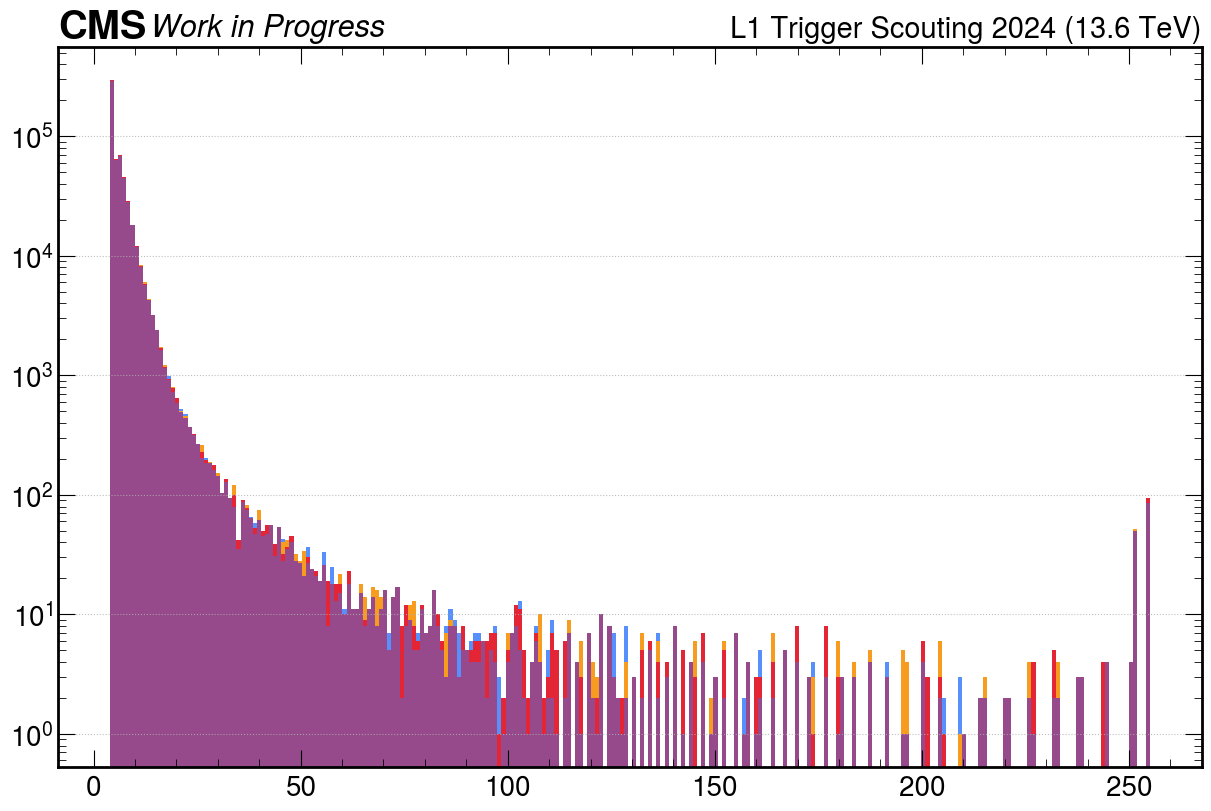

In [64]:
#Verifico che i dati siano coerenti, sia per Pt che per Ptu
fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.hist(bmtfPtLS133, bins = int(np.max(bmtfPtLS133)))
ax.hist(bmtfPtLS263, bins = int(np.max(bmtfPtLS263)))
ax.hist(bmtfPtLS264, bins = int(np.max(bmtfPtLS264)))
ax.hist(bmtfPtLS306, bins = int(np.max(bmtfPtLS306)))


#ax.set_xlabel('BX number')
#ax.set_ylabel('Stub rate [Hz]')
#ax.set_xlim(0, 20)
ax.grid(visible=True, axis='y')
ax.set_yscale('log')

255.0


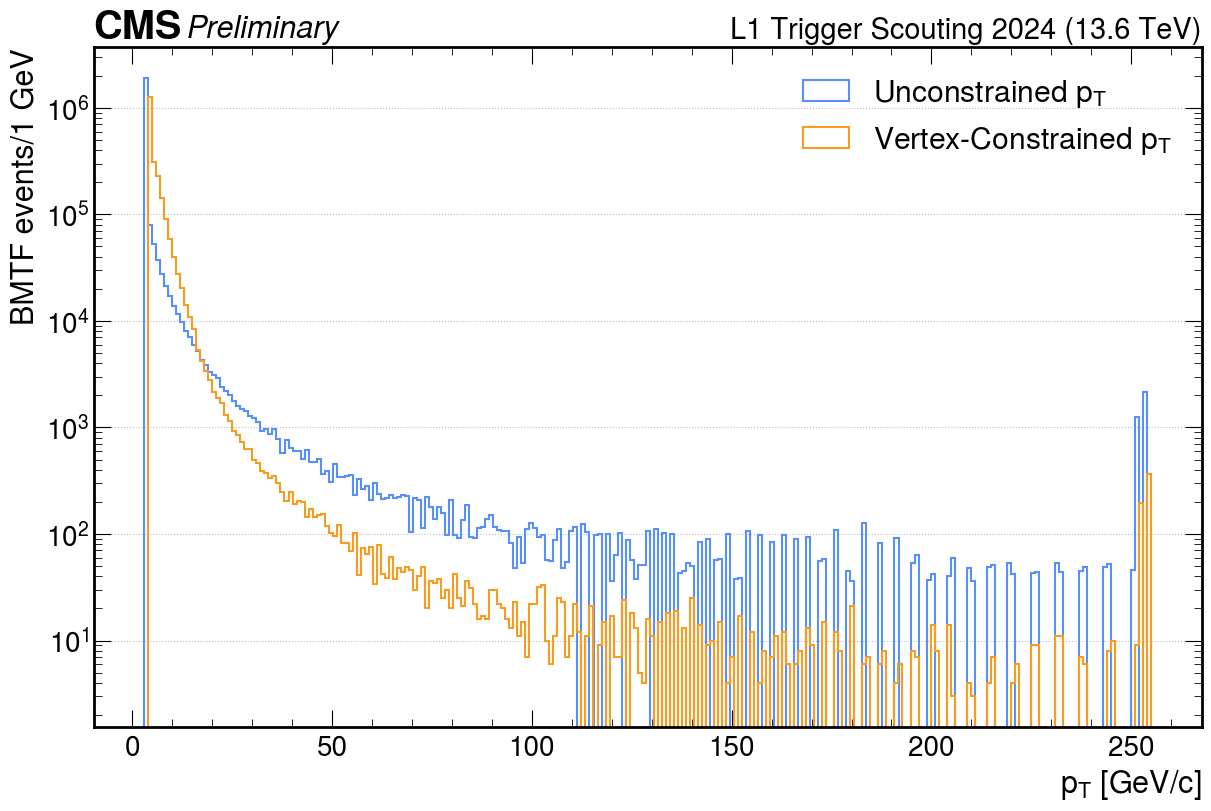

In [65]:
#Plot di Pt e Ptu uniti

print(np.max(Pt))

fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.hist(Ptu, bins = 250,  label='Unconstrained $p_T$', histtype='step', linewidth = 1.5)
ax.hist(Pt, bins = 250, label='Vertex-Constrained $p_T$', histtype='step', linewidth = 1.5)

ax.set_xlabel(r'$p_T$ [GeV/c]')
ax.set_ylabel(r'BMTF events/1 GeV')
ax.legend()
#ax.set_xlim(0, 50)
#ax.set_ylim(0, 1000)
ax.grid(visible=True, axis='y')
ax.set_yscale('log')

plt.savefig("../Immagini/BMTF_PtPtu.pdf")
plt.savefig("../Immagini/ImmaginiPNG/BMTF_PtPtu.png")

(1.0, 3.007999897003174)


'plt.savefig("../Immagini/BMTF_PtPtu.pdf")\nplt.savefig("../Immagini/ImmaginiPNG/BMTF_PtPtu.png")'

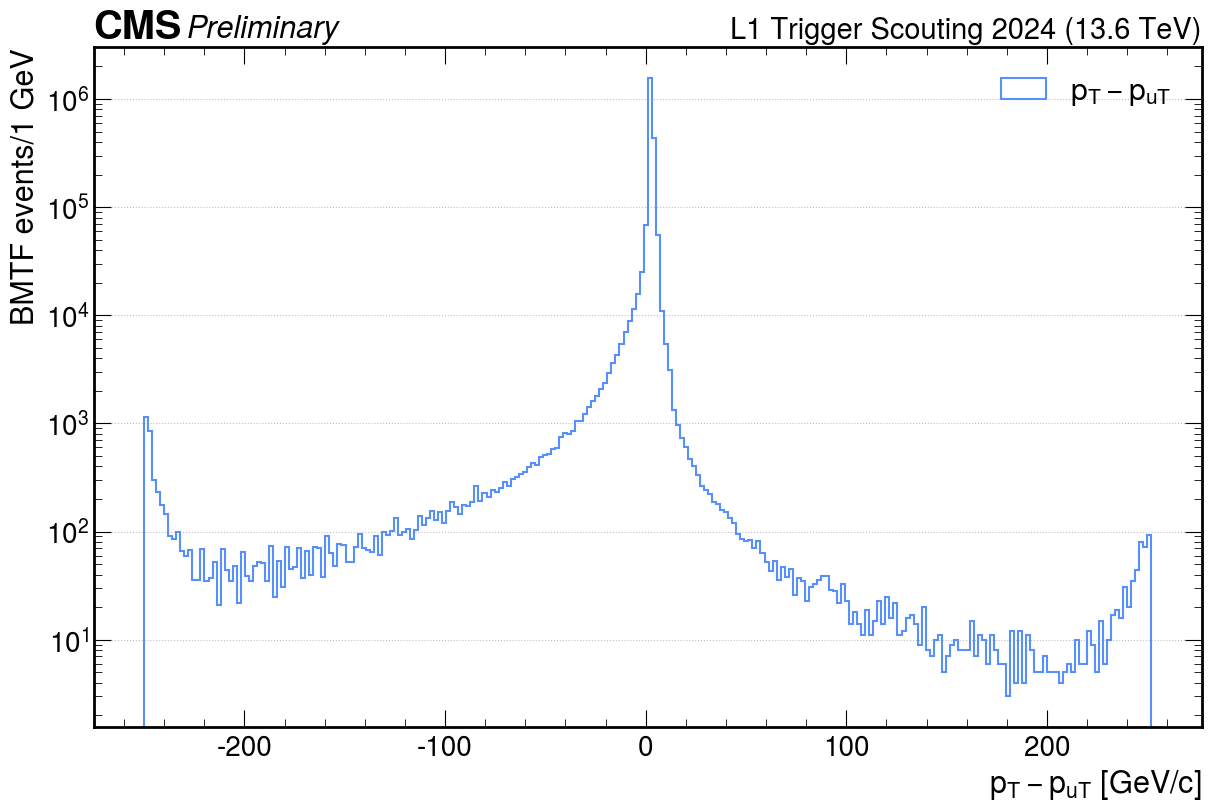

In [66]:
#Distribuzione della differenza
fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

counts, bin_edges, _ = ax.hist(PtDiff, bins = 250, label='$p_T - p_{uT}$', histtype='step', linewidth = 1.5)
max_count = np.max(counts)
max_bin_index = np.argmax(counts)
max_bin_range = (bin_edges[max_bin_index], bin_edges[max_bin_index + 1])

print(max_bin_range)

ax.set_xlabel(r'$p_T - p_{uT}$ [GeV/c]')
ax.set_ylabel(r'BMTF events/1 GeV')
ax.legend()
#ax.set_xlim(0, 50)
#ax.set_ylim(0, 1000)
ax.grid(visible=True, axis='y')
ax.set_yscale('log')

'''plt.savefig("../Immagini/BMTF_PtPtu.pdf")
plt.savefig("../Immagini/ImmaginiPNG/BMTF_PtPtu.png")'''

# Controllo eta per gli eventi nella coda "lunga"

In [67]:
print(len(PtDiff))

EtaPtLeft = [BmtfEta[i] for i in range(len(PtDiff)) if PtDiff[i] < 0]
PtDiffLeft = PtDiff[PtDiff < 0]
PtDiffRight = PtDiff[PtDiff >= 0]
EtaPtRight = [BmtfEta[i] for i in range(len(PtDiff)) if PtDiff[i] >= 0]

2260319


<>:28: SyntaxWarning: invalid escape sequence '\e'
<>:30: SyntaxWarning: invalid escape sequence '\e'
<>:28: SyntaxWarning: invalid escape sequence '\e'
<>:30: SyntaxWarning: invalid escape sequence '\e'
/var/folders/73/kb390p311j3ctnbn_v15y42w0000gn/T/ipykernel_60635/2282870018.py:28: SyntaxWarning: invalid escape sequence '\e'
  hep.histplot(EtaPtLeft_Hist, label="$\eta$ with $p_T - p_{uT} < 0$", yerr = False)
/var/folders/73/kb390p311j3ctnbn_v15y42w0000gn/T/ipykernel_60635/2282870018.py:30: SyntaxWarning: invalid escape sequence '\e'
  hep.histplot(EtaPt_Hist, label="All $\eta$", yerr = False)


[2.40761094 0.93012576 0.82694898 1.11459507 0.80014007 0.93036876
 1.03349128 0.79439309 0.93913222 2.43383648]


/var/folders/73/kb390p311j3ctnbn_v15y42w0000gn/T/ipykernel_60635/2282870018.py:37: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 1.5e6)


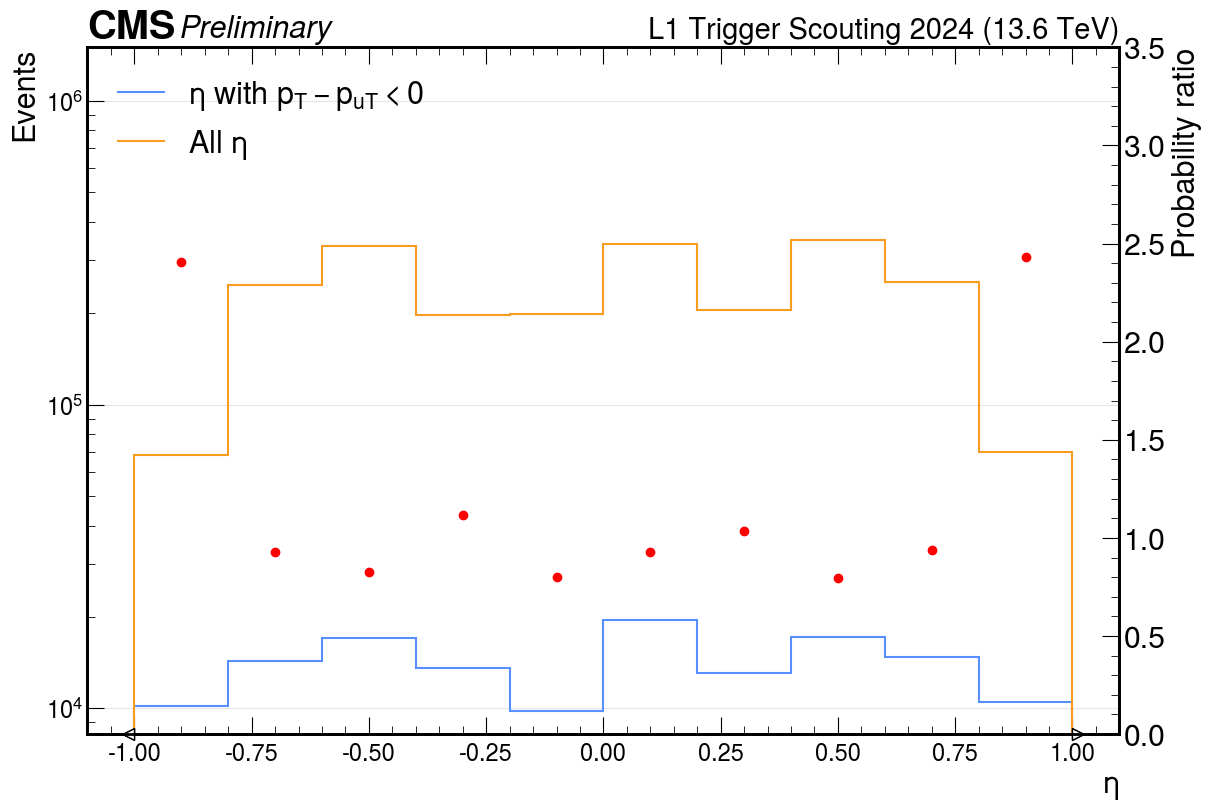

In [118]:
PtDiffLeftRange = np.arange(-252, 0, 10)
EtaRange = np.arange(-1, 1.2, 0.2)

EtaPtLeft_Hist = hist.Hist(hist.axis.Variable(np.round(EtaRange, 2), name='Eta', ),)
EtaPtRight_Hist = hist.Hist(hist.axis.Variable(np.round(EtaRange, 2), name='Eta', ),)
EtaPt_Hist = hist.Hist(hist.axis.Variable(np.round(EtaRange, 2), name='Eta', ),)

EtaPtLeft_Hist.fill(Eta=EtaPtLeft)
EtaPtRight_Hist.fill(Eta=EtaPtRight)
EtaPt_Hist.fill(Eta=BmtfEta)


#---------------------------------------------------------------------------------
NormEtaPt = EtaPt_Hist.values()/ np.sum(EtaPt_Hist.values())
NormEtaPtLeft = EtaPtLeft_Hist.values()/ np.sum(EtaPtLeft_Hist.values())
EtaRatio = NormEtaPtLeft / NormEtaPt

#---------------------------------------------------------------------------------

centers = 0.5 * (EtaRange[1:] + EtaRange[:-1])

print(EtaRatio)


fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize= FONTSIZE, rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

hep.histplot(EtaPtLeft_Hist, label="$\eta$ with $p_T - p_{uT} < 0$", yerr = False)
#hep.histplot(EtaPtRight_Hist)
hep.histplot(EtaPt_Hist, label="All $\eta$", yerr = False)

ax.set_ylabel(r'Events')
ax.set_xlabel(r'$\eta$')
ax.set_yscale("log")
ax.tick_params(axis='both', which='both', labelsize = FONTSIZE - 5)
#ax.legend()
ax.set_ylim(0, 1.5e6)

ax.legend(loc='upper left', fontsize = FONTSIZE)
ax2 = ax.twinx()

ax2.scatter(centers, EtaRatio, c = 'red')
ax2.set_ylim(0, 3.5)
ax2.set_ylabel("Probability ratio", fontsize = FONTSIZE)

'''plt.savefig("../Immagini/BMTFPhiEta.pdf")
plt.savefig("../Immagini/ImmaginiPNG/BMTFPhiEta.png")'''

plt.show()

# Controllo della carica e degli eventi non validi

Gli eventi non validi sono quelli che hanno carica incerta, probabilmente causato dalla velocità elevata 

In [69]:
BmtfSignLS133 = ak.flatten(bmtf_awk_LS133.bmtfHwSign)
BmtfSignLS263 = ak.flatten(bmtf_awk_LS263.bmtfHwSign)
BmtfSignLS264 = ak.flatten(bmtf_awk_LS264.bmtfHwSign)
BmtfSignLS306 = ak.flatten(bmtf_awk_LS306.bmtfHwSign)

#Assumo che 0 sia carica positiva e 1 sia carica negativa. Ma non posso esserne sicuro

BmtfSign = np.bincount(ak.concatenate([BmtfSignLS133, BmtfSignLS263, BmtfSignLS264, BmtfSignLS306]))

BmtfSignValidLS133 = ak.flatten(bmtf_awk_LS133.bmtfHwSignValid)
BmtfSignValidLS263 = ak.flatten(bmtf_awk_LS263.bmtfHwSignValid)
BmtfSignValidLS264 = ak.flatten(bmtf_awk_LS264.bmtfHwSignValid)
BmtfSignValidLS306 = ak.flatten(bmtf_awk_LS306.bmtfHwSignValid)

BmtfSignValid = np.bincount(ak.concatenate([BmtfSignValidLS133, BmtfSignValidLS263, BmtfSignValidLS264, BmtfSignValidLS306]))


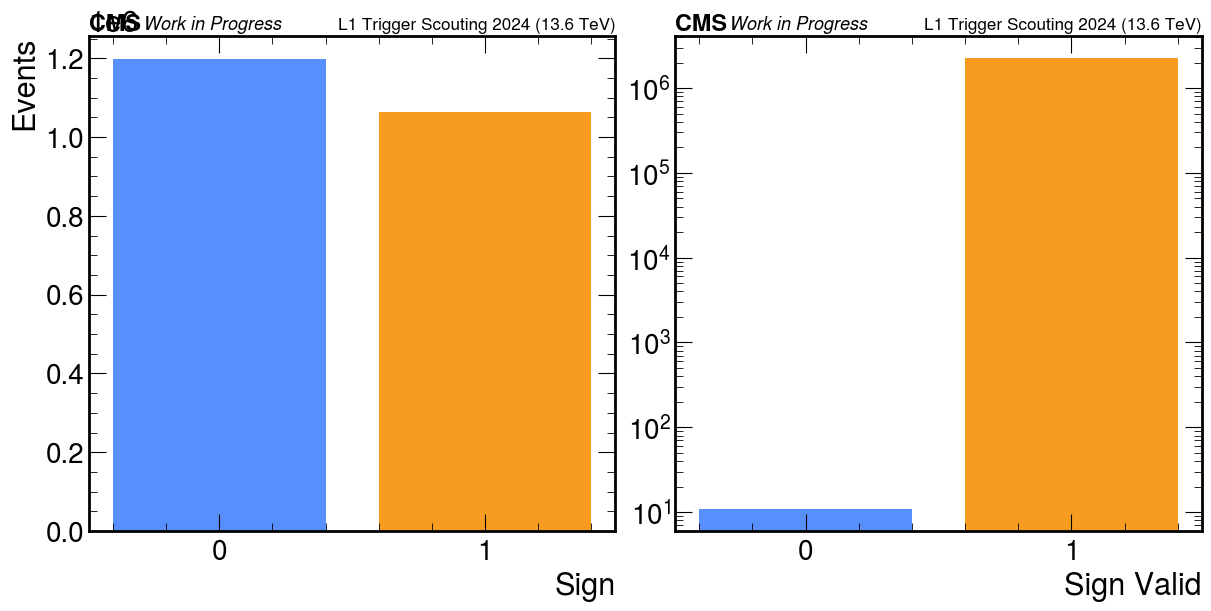

In [70]:

fig, ax = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

axs = ax[0]
set_label_font(axs, FONTSIZE)
set_tick_font(axs, FONTSIZE - 2)
draw_cms_label(axs, fontsize= FONTSIZE - 9, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

axs.bar(np.arange(1), BmtfSign[0], label = 'Positive charge')
axs.bar(np.arange(1, 2), BmtfSign[1], label = 'Negative charge')
axs.set_xlabel('Sign', fontsize = FONTSIZE)
axs.set_ylabel('Events', fontsize = FONTSIZE)
#axs.legend()
axs.grid(visible=False, axis='y')
#axs.set_yscale('log')

axs.set_xticks([0, 1])

axs = ax[1]

set_label_font(axs, FONTSIZE)
set_tick_font(axs, FONTSIZE - 2)
draw_cms_label(axs, fontsize= FONTSIZE - 9, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

axs.bar(np.arange(1), BmtfSignValid[0])
axs.bar(np.arange(1, 2), BmtfSignValid[1])

axs.set_xlabel('Sign Valid')
axs.grid(visible=False, axis='y')
axs.set_yscale('log')

axs.set_xticks([0, 1])

plt.savefig("../Immagini/BMTF_sign.pdf")
plt.savefig("../Immagini/ImmaginiPNG/BMTF_sign.png")

In [71]:
#Permette di verificare il momento delle particelle la cui carica è invalida. Come ci aspettiamo questi muoni hanno mooento molto alto, 255GeV/c
NotSignLS133, NotPtLS133 = CheckChargeAndMomentum(BmtfSignValidLS133, BmtfSignLS133, bmtfPtLS133, bmtfPtuLS133)
NotSignLS263, NotPtLS263 = CheckChargeAndMomentum(BmtfSignValidLS263, BmtfSignLS263, bmtfPtLS263, bmtfPtuLS263)
NotSignLS264, NotPtLS264 = CheckChargeAndMomentum(BmtfSignValidLS264, BmtfSignLS264, bmtfPtLS264, bmtfPtuLS264)
NotSignLS306, NotPtLS306 = CheckChargeAndMomentum(BmtfSignValidLS306, BmtfSignLS306, bmtfPtLS306, bmtfPtuLS306)

# Angular Distribution of bmtf stubs 

In [72]:
BmtfProcessorLS133 = ak.flatten(bmtf_awk_LS133.bmtfProcessor)
BmtfProcessorLS263 = ak.flatten(bmtf_awk_LS263.bmtfProcessor)
BmtfProcessorLS264 = ak.flatten(bmtf_awk_LS264.bmtfProcessor)
BmtfProcessorLS306 = ak.flatten(bmtf_awk_LS306.bmtfProcessor)

BmtfPhiLS133 = ak.flatten(bmtf_awk_LS133.bmtfPhi)
BmtfPhiLS263 = ak.flatten(bmtf_awk_LS263.bmtfPhi)
BmtfPhiLS264 = ak.flatten(bmtf_awk_LS264.bmtfPhi)
BmtfPhiLS306 = ak.flatten(bmtf_awk_LS306.bmtfPhi)

In [73]:
#Vegono importati da UtilityAndConst.py
'''BmtfPhiDistributionLS133 = PhiPerSector(BmtfPhiLS133, BmtfProcessorLS133)
BmtfPhiDistributionLS263 = PhiPerSector(BmtfPhiLS263, BmtfProcessorLS263)
BmtfPhiDistributionLS264 = PhiPerSector(BmtfPhiLS264, BmtfProcessorLS264)
BmtfPhiDistributionLS306 = PhiPerSector(BmtfPhiLS306, BmtfProcessorLS306)

ak.to_parquet(BmtfPhiDistributionLS133, 'BmtfPhiDistributionLS133.parquet')
ak.to_parquet(BmtfPhiDistributionLS263, 'BmtfPhiDistributionLS263.parquet')
ak.to_parquet(BmtfPhiDistributionLS264, 'BmtfPhiDistributionLS264.parquet')
ak.to_parquet(BmtfPhiDistributionLS306, 'BmtfPhiDistributionLS306.parquet')'''

"BmtfPhiDistributionLS133 = PhiPerSector(BmtfPhiLS133, BmtfProcessorLS133)\nBmtfPhiDistributionLS263 = PhiPerSector(BmtfPhiLS263, BmtfProcessorLS263)\nBmtfPhiDistributionLS264 = PhiPerSector(BmtfPhiLS264, BmtfProcessorLS264)\nBmtfPhiDistributionLS306 = PhiPerSector(BmtfPhiLS306, BmtfProcessorLS306)\n\nak.to_parquet(BmtfPhiDistributionLS133, 'BmtfPhiDistributionLS133.parquet')\nak.to_parquet(BmtfPhiDistributionLS263, 'BmtfPhiDistributionLS263.parquet')\nak.to_parquet(BmtfPhiDistributionLS264, 'BmtfPhiDistributionLS264.parquet')\nak.to_parquet(BmtfPhiDistributionLS306, 'BmtfPhiDistributionLS306.parquet')"

In [74]:
#Concatenazione dei 12 array per i 4 file:
BmtfPhiDistribution = ArrayConcatenation(BmtfPhiDistributionLS133, BmtfPhiDistributionLS263, BmtfPhiDistributionLS264, BmtfPhiDistributionLS306)

In [75]:
print(BmtfPhiDistribution[0])

[-0.0982, -0.0218, -0.0545, -0.0655, -0.109, ..., -0.415, -0.229, -0.153, 0.12]


<>:20: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\p'
/var/folders/73/kb390p311j3ctnbn_v15y42w0000gn/T/ipykernel_60635/2279509315.py:20: SyntaxWarning: invalid escape sequence '\p'
  ax.set_xlabel('$\phi$ [rad]')


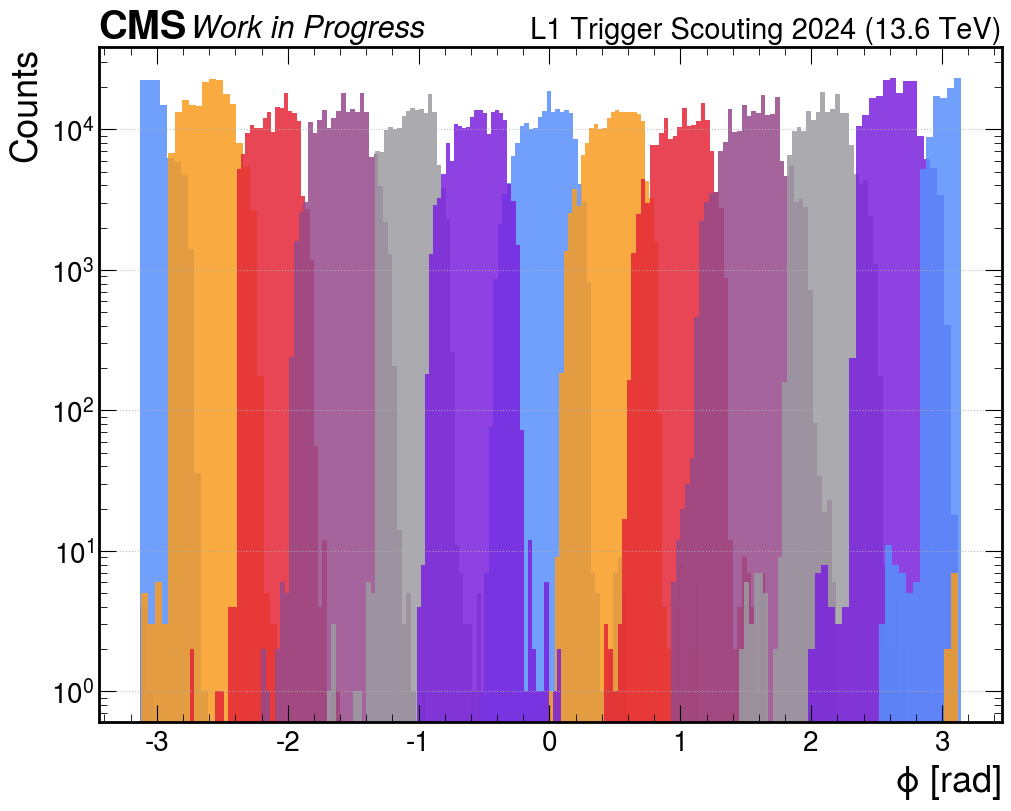

In [76]:
fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.hist(BmtfPhiDistribution[0], bins = 35, alpha = 0.85)
ax.hist(BmtfPhiDistribution[1], bins = 35, alpha = 0.85)
ax.hist(BmtfPhiDistribution[2], bins = 35, alpha = 0.85)
ax.hist(BmtfPhiDistribution[3], bins = 35, alpha = 0.85)
ax.hist(BmtfPhiDistribution[4], bins = 35, alpha = 0.85)
ax.hist(BmtfPhiDistribution[5], bins = 120, alpha = 0.85)
ax.hist(BmtfPhiDistribution[6], bins = 120, alpha = 0.85)
ax.hist(BmtfPhiDistribution[7], bins = 120, alpha = 0.85)
ax.hist(BmtfPhiDistribution[8], bins = 35, alpha = 0.85)
ax.hist(BmtfPhiDistribution[9], bins = 35, alpha = 0.85)
ax.hist(BmtfPhiDistribution[10], bins = 35, alpha = 0.85)
ax.hist(BmtfPhiDistribution[11], bins = 35, alpha = 0.85)


ax.set_xlabel('$\phi$ [rad]')
ax.set_ylabel('Counts')
#ax.legend()

ax.grid(visible=True, axis='y')
ax.set_yscale('log')


plt.savefig("../Immagini/BMTF_PhiDistriution.pdf")
plt.savefig("../Immagini/ImmaginiPNG/BMTF_PhiDistribution.png")

# DXY histogram: Da controllare

In [77]:
BmtfHwDXYLS133 = bmtf_awk_LS133.bmtfHwDXY
BmtfHwDXYLS263 = bmtf_awk_LS263.bmtfHwDXY
BmtfHwDXYLS264 = bmtf_awk_LS264.bmtfHwDXY
BmtfHwDXYLS306 = bmtf_awk_LS306.bmtfHwDXY

BmtfHwDXY = np.concatenate([ak.flatten(BmtfHwDXYLS133), ak.flatten(BmtfHwDXYLS263), ak.flatten(BmtfHwDXYLS264), ak.flatten(BmtfHwDXYLS306)])

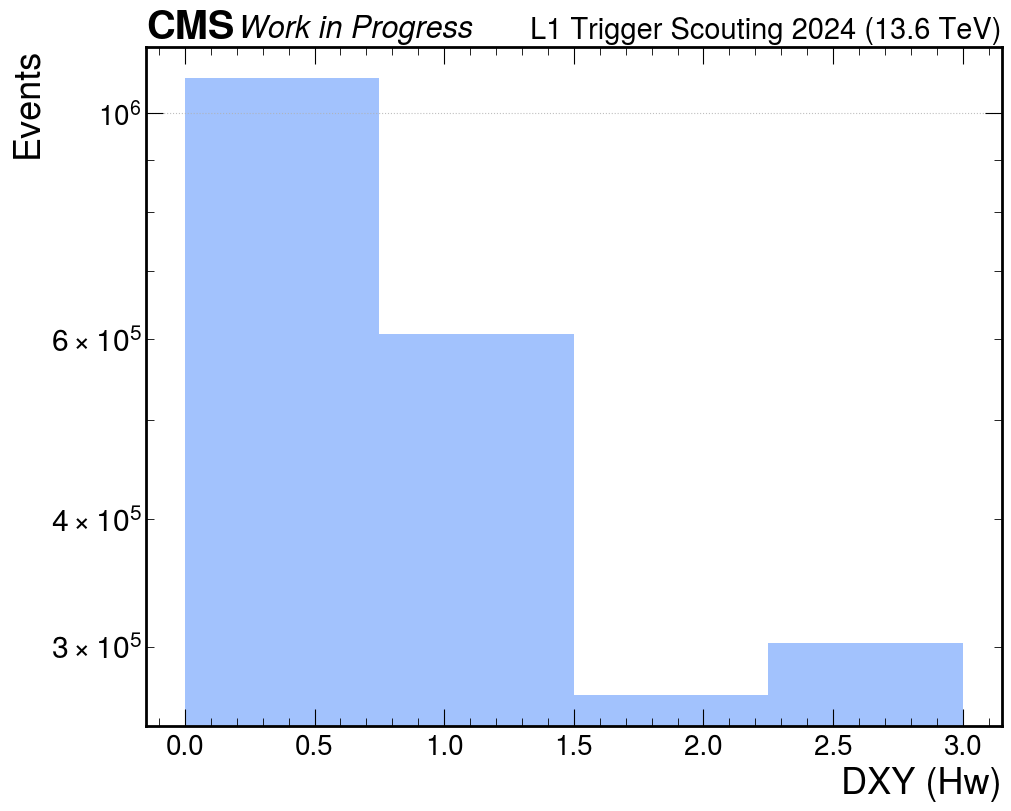

In [78]:
fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.hist(BmtfHwDXY, bins = 4, alpha = 0.55)



ax.set_xlabel('DXY (Hw)')
ax.set_ylabel('Events')
#ax.legend()

ax.grid(visible=True, axis='y')
ax.set_yscale('log')

plt.savefig("../Immagini/BMTF_DXY.pdf")
plt.savefig("../Immagini/ImmaginiPNG/BMTF_DXY.png")

# Qualità, Eta e Phi DA CONTROLLARE

Studiamo alcuni grafici bidimensionali in rapporto con la qualità

In [79]:
BmtfHwQualLS133 = ak.flatten(bmtf_awk_LS133.bmtfHwQual)
BmtfHwQualLS263 = ak.flatten(bmtf_awk_LS263.bmtfHwQual)
BmtfHwQualLS264 = ak.flatten(bmtf_awk_LS264.bmtfHwQual)
BmtfHwQualLS306 = ak.flatten(bmtf_awk_LS306.bmtfHwQual)

BmtfEtaLS133 = ak.flatten(bmtf_awk_LS133.bmtfEta)
BmtfEtaLS263 = ak.flatten(bmtf_awk_LS263.bmtfEta)
BmtfEtaLS264 = ak.flatten(bmtf_awk_LS264.bmtfEta)
BmtfEtaLS306 = ak.flatten(bmtf_awk_LS306.bmtfEta)

BmtfPhi = ak.concatenate([BmtfPhiLS133, BmtfPhiLS263, BmtfPhiLS264, BmtfPhiLS306])
BmtfEta = ak.concatenate([BmtfEtaLS133, BmtfEtaLS263, BmtfEtaLS264, BmtfEtaLS306])
BmtfWeights = np.array(ak.concatenate([BmtfHwQualLS133, BmtfHwQualLS263, BmtfHwQualLS264, BmtfHwQualLS306]))
#Trasformo i pesi (QUALITA') in np.array per fare funzionare la funzione WeightedBiDimHist

In [80]:
#Creazione dell'istogramma 2dimensionale. Per PHI ed ETA:
BinPhi = 15
BinEta = 15

PhiRange, PhiIndicies = Bins(ak.min(BmtfPhi), ak.max(BmtfPhi), BinPhi, BmtfPhi)
EtaRange, EtaIndicies = Bins(ak.min(BmtfEta), ak.max(BmtfEta), BinEta, BmtfEta)

print(EtaRange)

BiDimHist = WeightedBiDimHist(len(PhiRange), len(EtaRange), PhiIndicies, EtaIndicies, BmtfWeights)

[-1.01137495 -0.86689281 -0.72241068 -0.57792854 -0.43344641 -0.28896427
 -0.14448214  0.          0.14448214  0.28896427  0.43344641  0.57792854
  0.72241068  0.86689281  1.01137495]


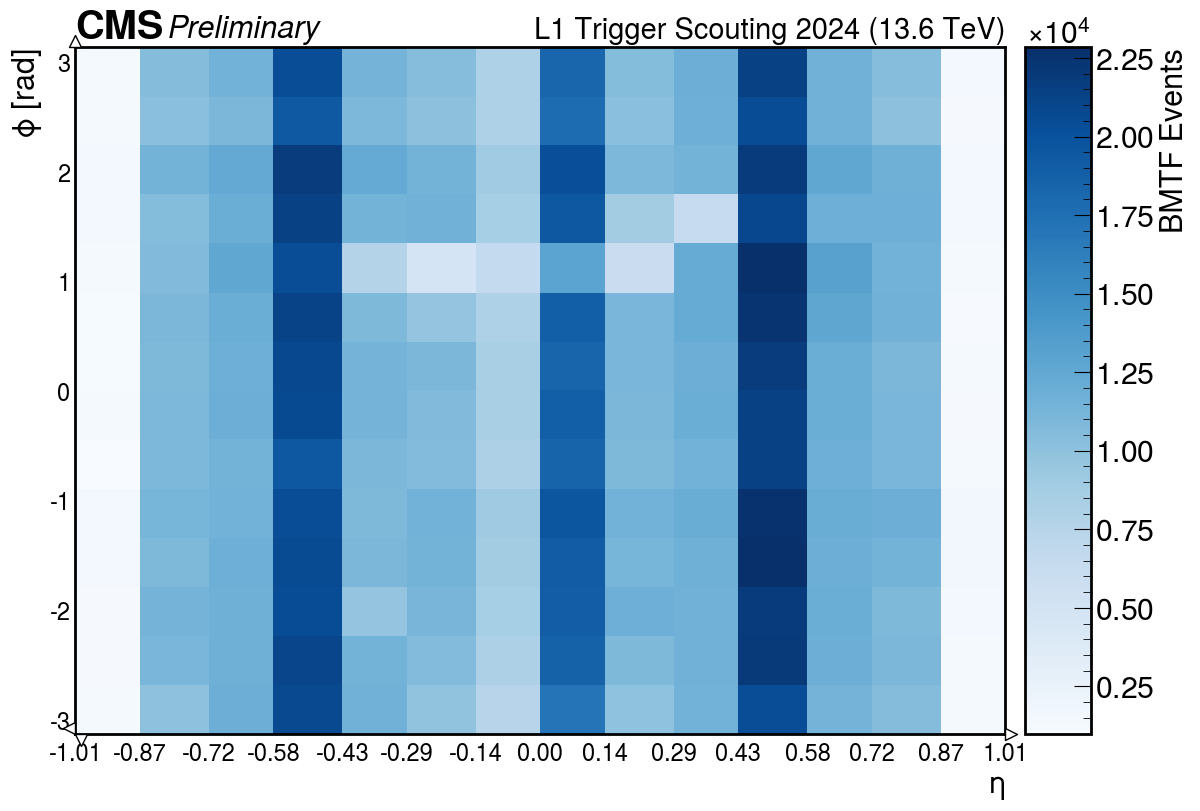

In [81]:

hist2d = hist.Hist(
    hist.axis.Variable(np.round(EtaRange, 2), name='Eta', ),
    hist.axis.Variable(np.round(PhiRange, 2), name='Phi'),
)
hist2d.fill(Phi=BmtfPhi, Eta=BmtfEta)

fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize= FONTSIZE, rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

hep.hist2dplot(hist2d, cbar=True, cmap='Blues', ax=ax)

cbar = ax.collections[0].colorbar
cbar.set_label('BMTF Events', fontsize=FONTSIZE)

#Notazione scientifica
cbar.formatter = ticker.ScalarFormatter(useMathText=True)
cbar.formatter.set_scientific(True)  
cbar.formatter.set_powerlimits((-2, 2))  
cbar.update_ticks() 

ax.set_xlabel(r'$\eta$')
ax.set_ylabel(r'$\phi$ [rad]')

ax.tick_params(axis='both', which='both', length=0, labelsize = FONTSIZE - 5)

plt.savefig("../Immagini/BMTFPhiEta.pdf")
plt.savefig("../Immagini/ImmaginiPNG/BMTFPhiEta.png")

plt.show()

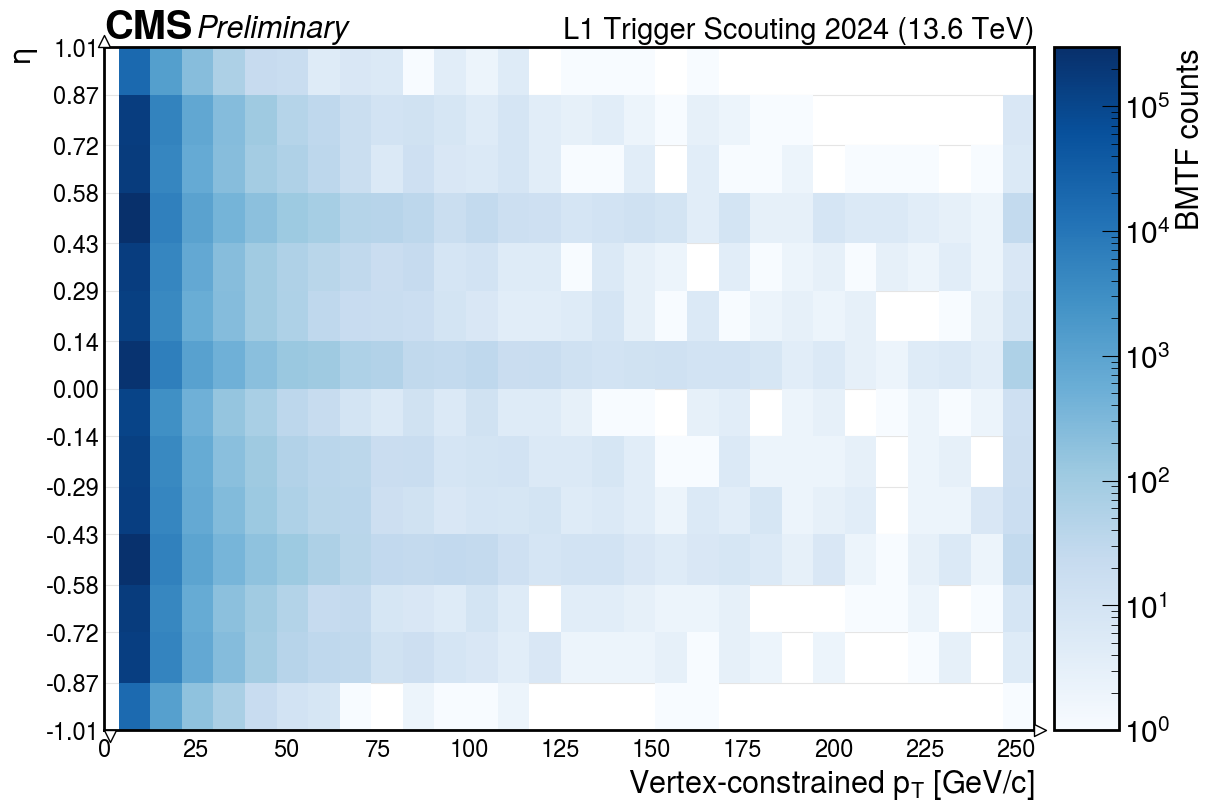

In [82]:
#Grafico bidimensionale per i Bmtf del momento e di eta 

BinEta = 15
BinPt = 30

EtaRange, EtaIndicies = Bins(ak.min(BmtfEta), ak.max(BmtfEta), BinEta, BmtfEta)
PtRange, PtIndicies = Bins(ak.min(Pt), ak.max(Pt), BinPt, Pt)

hist2d = hist.Hist(
    hist.axis.Variable(np.round(PtRange, 2), name='Pt', label='Pt number'),
    hist.axis.Variable(np.round(EtaRange, 2), name='Eta', label='Eta number'),
)
hist2d.fill(Pt=Pt, Eta=BmtfEta)

fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize= FONTSIZE, rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

from matplotlib.colors import LogNorm

hep.hist2dplot(hist2d, cbar=True, cmap='Blues', ax=ax, norm = LogNorm())

cbar = ax.collections[0].colorbar
cbar.set_label('BMTF counts', fontsize=FONTSIZE)

ax.set_xlabel(r'Vertex-constrained $p_T$ [GeV/c]')
ax.set_ylabel(r'$\eta$')
ax.set_xticks(np.arange(0, 275, 25))

ax.tick_params(axis='both', which='both', length=0, labelsize = FONTSIZE - 5)

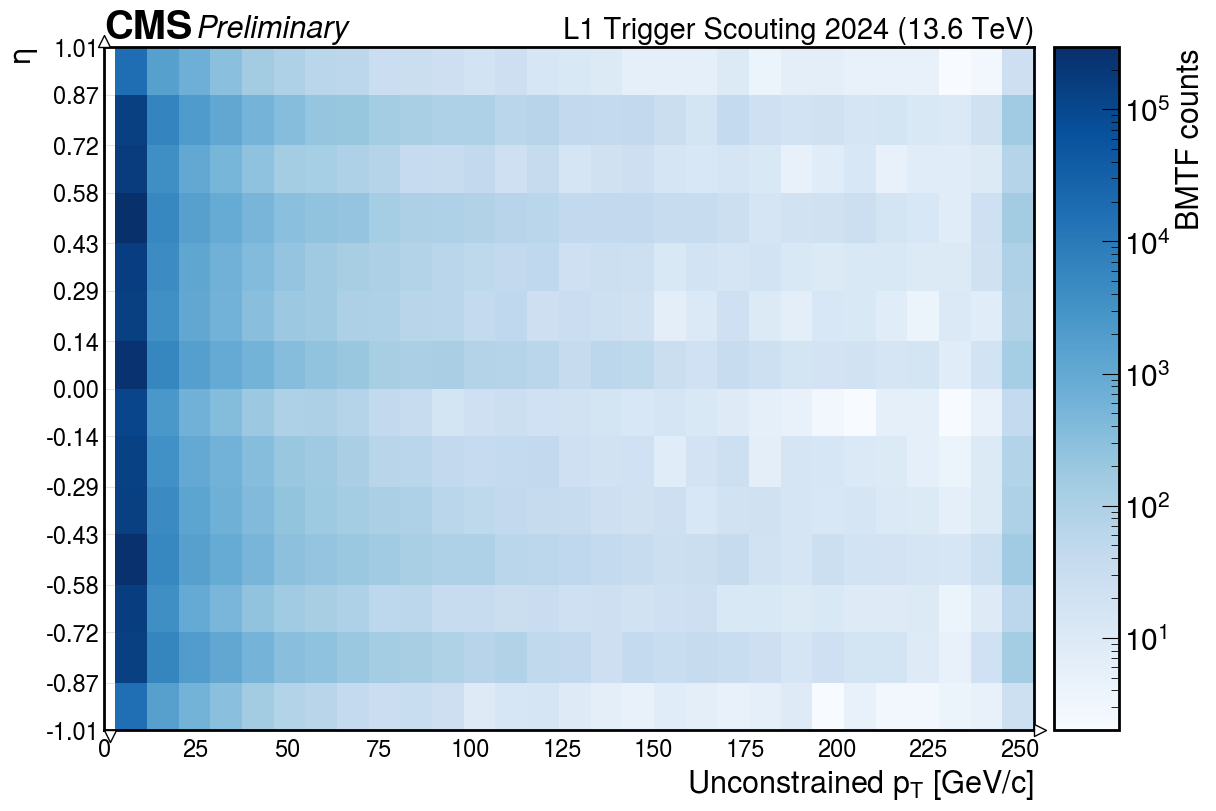

In [83]:
#Grafico bidimensionale per i GMT del momento e di eta 

BinEta = 15
BinPtu = 30

EtaRange, EtaIndicies = Bins(ak.min(BmtfEta), ak.max(BmtfEta), BinEta, BmtfEta)
PtuRange, PtuIndicies = Bins(ak.min(Ptu), ak.max(Ptu), BinPtu, Ptu)

hist2d = hist.Hist(
    hist.axis.Variable(np.round(PtuRange, 2), name='Ptu', label='Ptu number'),
    hist.axis.Variable(np.round(EtaRange, 2), name='Eta', label='Eta number'),
)
hist2d.fill(Ptu=Ptu, Eta=BmtfEta)

fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize= FONTSIZE, rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

from matplotlib.colors import LogNorm

hep.hist2dplot(hist2d, cbar=True, cmap='Blues', ax=ax, norm = LogNorm())

cbar = ax.collections[0].colorbar
cbar.set_label('BMTF counts', fontsize=FONTSIZE)

ax.set_xlabel(r'Unconstrained $p_T$ [GeV/c]')
ax.set_ylabel(r'$\eta$')
ax.set_xticks(np.arange(0, 275, 25))

ax.tick_params(axis='both', which='both', length=0, labelsize = FONTSIZE - 5)